<a href="https://colab.research.google.com/github/yunseobYuk/ML-DL-Learning/blob/main/14_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C_%EA%B5%AC%ED%98%84%ED%95%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 단항 선형 회귀 실습
* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
import torch
import torch.nn as nn # 모델을 만드는 모듈
import torch.optim as optim # 학습을 시킬 때 쓰는 모듈
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(2024)

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
print(x_train, x_train.shape)
print(y_train, y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


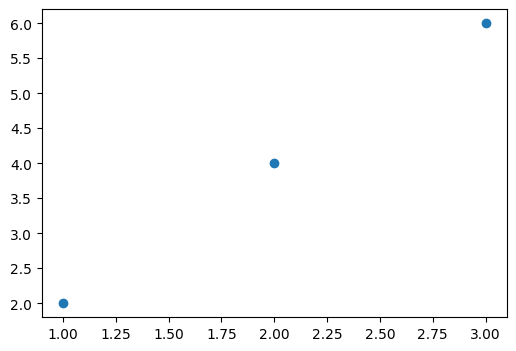

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train)

In [ ]:
# y = ax + b
model = nn.Linear(1,1) # 직선을 그어주는 방정식 만드는 함수
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
y_pred = model(x_train)
print(y_pred)

tensor([[0.7260],
        [0.7894],
        [0.8528]], grad_fn=<AddmmBackward0>)


In [ ]:
print(list(model.parameters())) # W: 0.0634, b: 0.6625
# y = 0.0634x + 0.6625
# x=1 : 0.0634 + 0.6625 = 0.7259
# x=2 : 0.0634*2 + 0.6625 = 0.7893

[Parameter containing:
tensor([[0.0634]], requires_grad=True), Parameter containing:
tensor([0.6625], requires_grad=True)]


In [ ]:
((y_pred-y_train)**2).mean() #MSE값 구하기

tensor(12.8082, grad_fn=<MeanBackward0>)

In [ ]:
loss = nn.MSELoss()(y_pred, y_train) # MSE함수 사용
loss

tensor(12.8082, grad_fn=<MseLossBackward0>)

# 2. 경사하강법(Gradient Descent)
* 비용함수의 값(오차)을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저 알고리즘이라고 함(최적의 기울기)
* 옵티마이저 알고리즘 중 가장 기본적인 기술이 경사하강법
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 "학습"이라고 부름
<center><img src='https://i.imgur.com/0fW4LTG.png' width=600></center>

* 학습률(Learning rate): 한 번 W를 움직인 거리(increment step)
* SGD(Stochastic Gradient Descent):
    - 랜덤하게 데이터를 하나씩 뽑아서 loss를 만듦
    - 데이터를 뽑고 다시 데이터를 넣고 반복
    - 빠르게 방향을 결정

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
loss = nn.MSELoss()(y_pred, y_train)

In [ ]:
# gradient를 초기화
optimizer.zero_grad()
# 역전파: 비용 함수를 미분하여 gradient(기울기) 계산
loss.backward()
# W와 b를 업데이트
optimizer.step()

print(list(model.parameters())) # W: 0.2177, b: 0.7267

[Parameter containing:
tensor([[0.2177]], requires_grad=True), Parameter containing:
tensor([0.7267], requires_grad=True)]


In [ ]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수(에포크)
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss: 6f}')

Epoch: 0/1000 Loss:  10.171454
Epoch: 100/1000 Loss:  0.142044
Epoch: 200/1000 Loss:  0.087774
Epoch: 300/1000 Loss:  0.054239
Epoch: 400/1000 Loss:  0.033517
Epoch: 500/1000 Loss:  0.020711
Epoch: 600/1000 Loss:  0.012798
Epoch: 700/1000 Loss:  0.007909
Epoch: 800/1000 Loss:  0.004887
Epoch: 900/1000 Loss:  0.003020
Epoch: 1000/1000 Loss:  0.001866


In [ ]:
print(list(model.parameters())) # W: 1.9499, b: 0.1138

[Parameter containing:
tensor([[1.9499]], requires_grad=True), Parameter containing:
tensor([0.1138], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[5]])
y_pred = model(x_test)
print(y_pred)

tensor([[9.8635]], grad_fn=<AddmmBackward0>)


# 3. 다중 선형 회귀
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
x_train = torch.FloatTensor([[73,80,75],
                             [93,88,93],
                             [89,91,90],
                             [96,98,100],
                             [73,66,70]])
y_train = torch.FloatTensor([[150],[190],[180],[200],[130]])

print(x_train, x_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]) torch.Size([5, 3])
tensor([[150.],
        [190.],
        [180.],
        [200.],
        [130.]]) torch.Size([5, 1])


In [ ]:
# y = a1x + a2x + a3x .. + b (독립변수가 늘어나는 만큼 기울기의 갯수가 늘어남)
model = nn.Linear(3, 1) # (입력, 결과)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [ ]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수(에포크)
epochs = 10000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss: 6f}')

Epoch: 0/10000 Loss:  38561.125000
Epoch: 100/10000 Loss:  43.880661
Epoch: 200/10000 Loss:  43.343727
Epoch: 300/10000 Loss:  42.829872
Epoch: 400/10000 Loss:  42.337685
Epoch: 500/10000 Loss:  41.866142
Epoch: 600/10000 Loss:  41.414219
Epoch: 700/10000 Loss:  40.980984
Epoch: 800/10000 Loss:  40.565197
Epoch: 900/10000 Loss:  40.166359
Epoch: 1000/10000 Loss:  39.783215
Epoch: 1100/10000 Loss:  39.415241
Epoch: 1200/10000 Loss:  39.061520
Epoch: 1300/10000 Loss:  38.721352
Epoch: 1400/10000 Loss:  38.394039
Epoch: 1500/10000 Loss:  38.079037
Epoch: 1600/10000 Loss:  37.775555
Epoch: 1700/10000 Loss:  37.483067
Epoch: 1800/10000 Loss:  37.201080
Epoch: 1900/10000 Loss:  36.929047
Epoch: 2000/10000 Loss:  36.666267
Epoch: 2100/10000 Loss:  36.412544
Epoch: 2200/10000 Loss:  36.167397
Epoch: 2300/10000 Loss:  35.930252
Epoch: 2400/10000 Loss:  35.700775
Epoch: 2500/10000 Loss:  35.478638
Epoch: 2600/10000 Loss:  35.263390
Epoch: 2700/10000 Loss:  35.054775
Epoch: 2800/10000 Loss:  34.8

In [ ]:
print(list(model.parameters())) # W: 0.3478, 0.6414, 1.0172, b: 0.2856

[Parameter containing:
tensor([[0.3478, 0.6414, 1.0172]], requires_grad=True), Parameter containing:
tensor([-0.2856], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[93,93,93]])
y_pred = model(x_test)
print(y_pred)

tensor([[186.3026]], grad_fn=<AddmmBackward0>)


# 4. temps.csv 데이터에서 기온에 따른 지면 온도 예측해보기

## 4-1. 개인답안

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/00. C.V_23.10/04. 머신러닝과 딥러닝/DATA/temps.csv', encoding='cp949')
temp_df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
a = torch.tensor(temp_df['기온(°C)'].values.reshape(8782,1))
print(a, a.shape)

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]], dtype=torch.float64) torch.Size([8782, 1])


In [ ]:
x_train = torch.FloatTensor(np.array(temp_df['기온(°C)']))
y_train = torch.FloatTensor(temp_df['지면온도(°C)'])
print(x_train, x_train.shape)
print(y_train, y_train.shape)

tensor([-8.7000, -7.3000, -6.7000,  ..., -7.3000, -9.0000, -9.2000]) torch.Size([8782])
tensor([-2.9000, -2.4000, -2.2000,  ..., -1.2000, -1.5000, -1.2000]) torch.Size([8782])


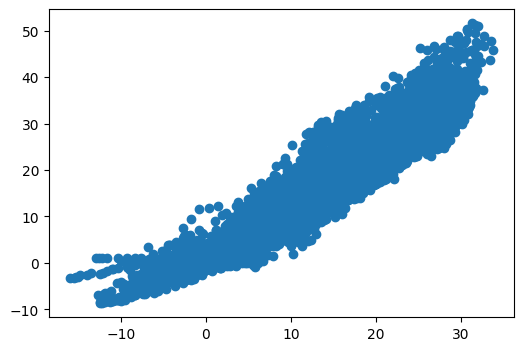

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(x_train, y_train)

In [ ]:
model = nn.Linear(1,1)
print(model)

Linear(in_features=1, out_features=1, bias=True)


## 4-2. 수업답안

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00. C.V_23.10/04. 머신러닝과 딥러닝/DATA/temps.csv', encoding='euc-kr')
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
df.isnull().mean()

지점          0.000000
지점명         0.000000
일시          0.000000
기온(°C)      0.000342
지면온도(°C)    0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().mean()

지점          0.0
지점명         0.0
일시          0.0
기온(°C)      0.0
지면온도(°C)    0.0
dtype: float64

In [ ]:
x_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

In [ ]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)
print(x_data.shape)
print(y_data.shape)

torch.Size([8779, 1])
torch.Size([8779, 1])


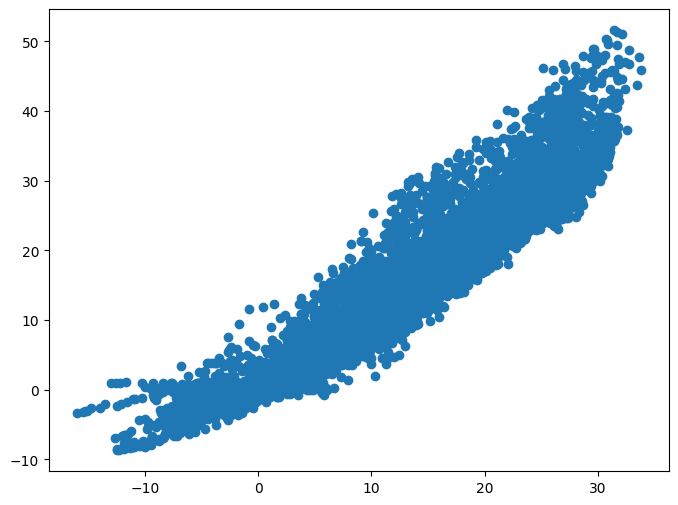

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)

In [ ]:
model = nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.0303]], requires_grad=True), Parameter containing:
tensor([0.4984], requires_grad=True)]


In [ ]:
# 반복 학습을 통해 틀린 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수(에포크)
epochs = 10000

for epoch in range(epochs + 1):
    y_pred = model(x_data)
    loss = nn.MSELoss()(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss: 6f}')

Epoch: 0/10000 Loss:  335.489014
Epoch: 100/10000 Loss:  12.980954
Epoch: 200/10000 Loss:  12.977272
Epoch: 300/10000 Loss:  12.974142
Epoch: 400/10000 Loss:  12.971481
Epoch: 500/10000 Loss:  12.969219
Epoch: 600/10000 Loss:  12.967294
Epoch: 700/10000 Loss:  12.965660
Epoch: 800/10000 Loss:  12.964271
Epoch: 900/10000 Loss:  12.963088
Epoch: 1000/10000 Loss:  12.962082
Epoch: 1100/10000 Loss:  12.961228
Epoch: 1200/10000 Loss:  12.960502
Epoch: 1300/10000 Loss:  12.959885
Epoch: 1400/10000 Loss:  12.959360
Epoch: 1500/10000 Loss:  12.958913
Epoch: 1600/10000 Loss:  12.958534
Epoch: 1700/10000 Loss:  12.958211
Epoch: 1800/10000 Loss:  12.957936
Epoch: 1900/10000 Loss:  12.957702
Epoch: 2000/10000 Loss:  12.957505
Epoch: 2100/10000 Loss:  12.957336
Epoch: 2200/10000 Loss:  12.957191
Epoch: 2300/10000 Loss:  12.957069
Epoch: 2400/10000 Loss:  12.956966
Epoch: 2500/10000 Loss:  12.956879
Epoch: 2600/10000 Loss:  12.956804
Epoch: 2700/10000 Loss:  12.956739
Epoch: 2800/10000 Loss:  12.956

In [ ]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0854]], requires_grad=True), Parameter containing:
tensor([0.8199], requires_grad=True)]


In [ ]:
y_pred = model(x_data).detach().numpy()
y_pred

array([[-8.622976 ],
       [-7.103439 ],
       [-6.452208 ],
       ...,
       [-7.103439 ],
       [-8.948592 ],
       [-9.1656685]], dtype=float32)

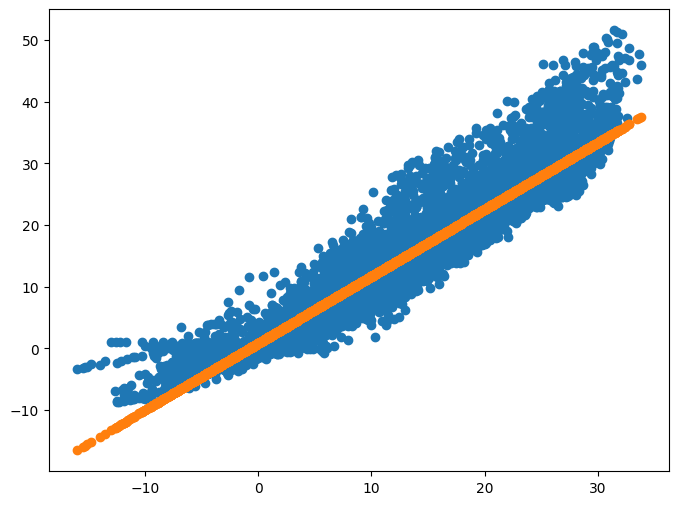

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)